In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [2]:
daimond_train=pd.read_csv('train.csv')
daimond_train[daimond_train.duplicated()]
daimond_train.duplicated().sum().all()

daimond_test=pd.read_csv('test.csv')
daimond_test[daimond_test.duplicated()]
daimond_test.duplicated().sum().all()


False

In [3]:
print(daimond_train.shape)
print(daimond_test.shape)

(43152, 11)
(10788, 10)


In [4]:
daimond_train.head()


,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [5]:
daimond_test.head()


,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


In [6]:
daimond_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [7]:
s = (daimond_train.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


In [8]:

# Make copy to avoid changing original data 
daimond_train_new = daimond_train.copy()

# Label Encoding
label_encoder = LabelEncoder()
for col in object_cols:
    daimond_train_new[col] = label_encoder.fit_transform(daimond_train_new[col])
daimond_train_new.head()


,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,2,5,3,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,3,3,7,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,2,2,5,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,2,3,5,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,3,4,7,61.0,57.0,2596,5.76,5.72,3.50


In [9]:
daimond_train.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


<AxesSubplot:>

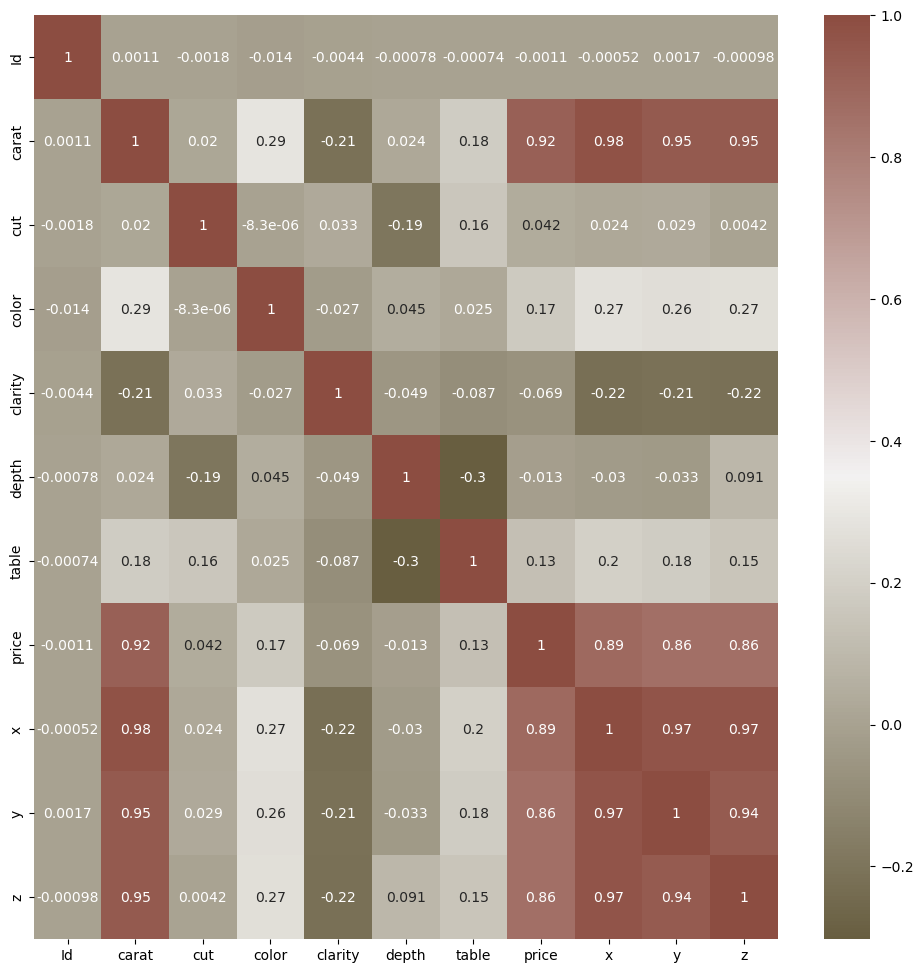

In [10]:
#correlation matrix
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= daimond_train_new.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True,)

Checking for outliers in numerical columns.

This is a function that takes a column and sort it's values and calculate it's IQR,Q1,Q2 and applies the outliers rule that returns the extremly higher and lower values that we should eliminate from our dataset to improve our model accuracy.

I will apply this function to the features i am willing to use in my Linear regression model.

In [11]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

outlier_treatment(daimond_train['depth'])

(58.75, 64.75)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

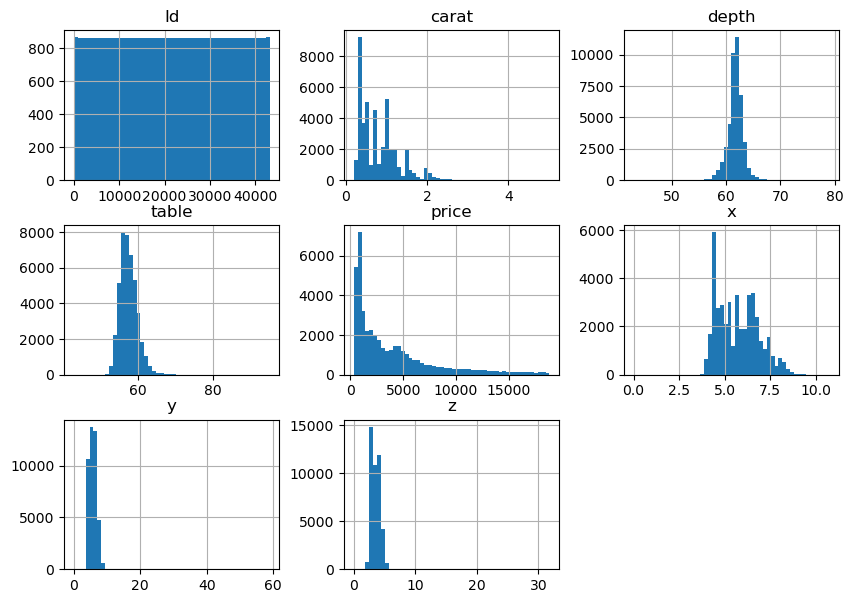

In [13]:
daimond_train.hist(bins=50, figsize=(10,7))
plt.show() 

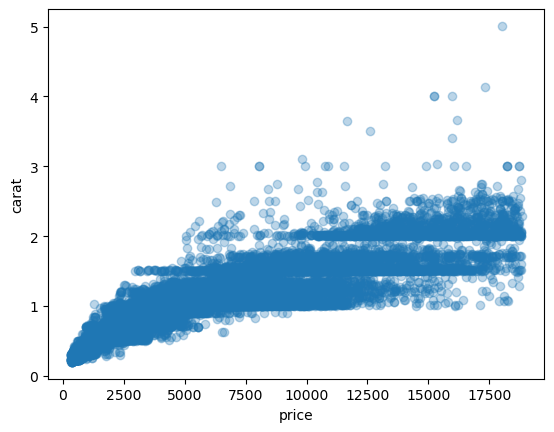

In [14]:
plt.scatter(daimond_train["price"], daimond_train["carat"], alpha=0.3)
plt.xlabel("price")
plt.ylabel("carat")
plt.show()

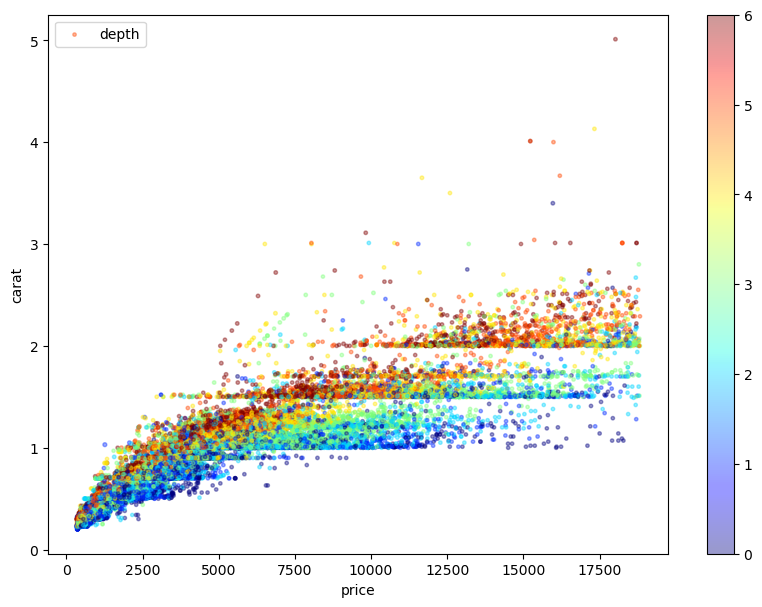

In [15]:
color_matrix = daimond_train["color"].astype("category").cat.codes

daimond_train.plot(kind="scatter", y="carat", x="price", alpha=0.4,
             s=daimond_train["depth"]/10, label="depth", figsize=(10, 7),
             c=color_matrix, cmap=plt.get_cmap("jet"), colorbar=True, 
             sharex=False)
plt.legend()
plt.show()

In [16]:
corr_matrix = daimond_train.corr()
print(corr_matrix["price"].sort_values(ascending=False))
corr_matrix = daimond_train.corr()


price    1.000000
carat    0.921911
x        0.885181
y        0.861354
z        0.857665
table    0.128501
Id      -0.001111
depth   -0.013137
Name: price, dtype: float64


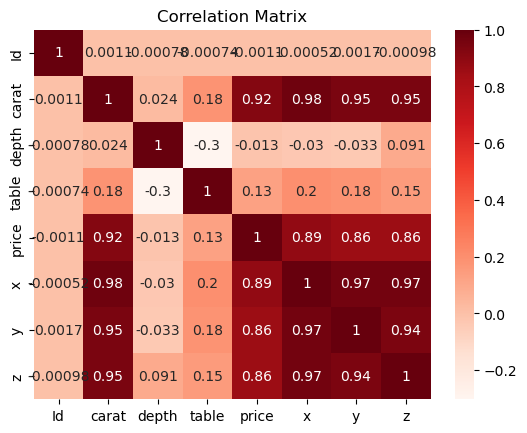

In [17]:
sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.Reds)
plt.title("Correlation Matrix")
plt.show()

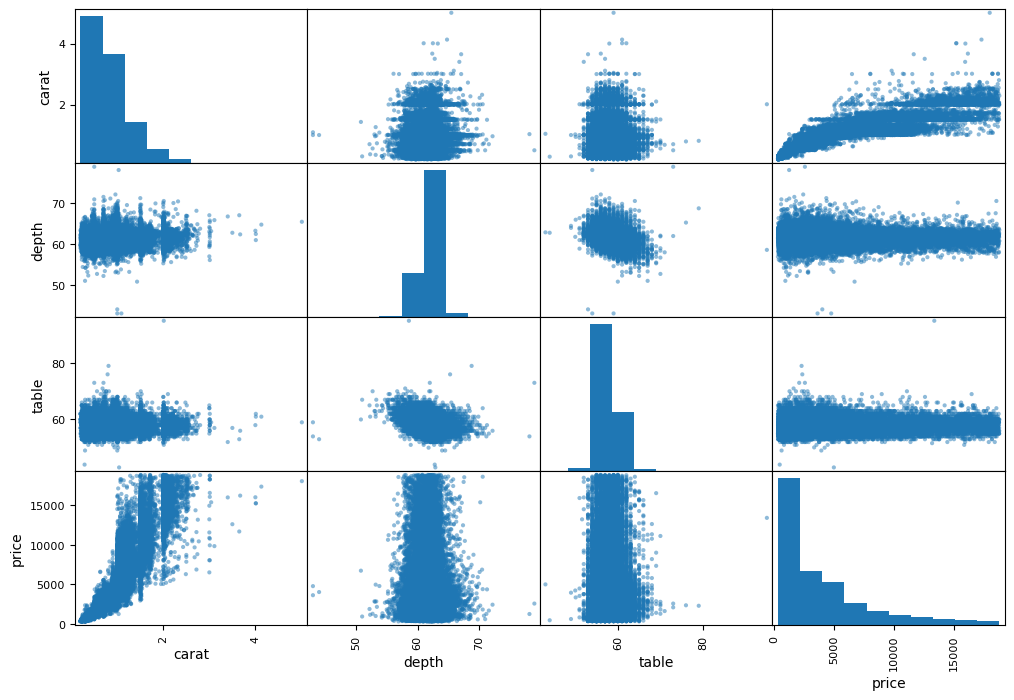

In [18]:
from pandas.plotting import scatter_matrix
attributes = ["carat", "cut", "color", "clarity","depth","table","price"]

scatter_matrix(daimond_train[attributes], figsize=(12, 8))
plt.show()



Observations
Data consists of 53940 rows and 11 columns
There are no null values in the data
There are no duplicated rows in the data
Dimension columns x,y,z contains (0) values which doesn't make any sense
There are some outliers in the features i am willing to use in my Linear regression model which will affect it's accuracy
It seems that the categorical values are unique and not repeated in other forms

# Data_cleaning


I noticed that the dimensions columns (x,y,z) has zero values which is wrong values and will affect my model so i will drop these columns from my dataset

In [19]:
daimond_train.drop(daimond_train[daimond_train['x']==0].index,inplace=True) 
daimond_train.drop(daimond_train[daimond_train['y']==0].index,inplace=True)
daimond_train.drop(daimond_train[daimond_train['z']==0].index,inplace=True)



I will remove the outliers in the following columns (Depth,Table,X,Y,Z)

In [20]:
daimond_train=daimond_train[(daimond_train['depth']>49) & (daimond_train['depth']<75)]#[(daimond_train['depth']>49) & (daimond_train['depth']<75)]
daimond_train=daimond_train[(daimond_train['table']>50) & (daimond_train['table']<70)]#[(daimond_train['table']>50) & (daimond_train['table']<70)]
daimond_train=daimond_train[(daimond_train['x']>2.8) & (daimond_train['x']<70)]#[(daimond_train['x']>2.8) & (daimond_train['x']<70)]
daimond_train=daimond_train[(daimond_train['y']>2) & (daimond_train['y']<15)]#[(daimond_train['y']>2) & (daimond_train['y']<15)]
daimond_train=daimond_train[(daimond_train['z']>1.2) & (daimond_train['z']<5.7)]#[(daimond_train['z']>1.2) & (daimond_train['z']<5.7)]



I will convert the categorical columns with the label encoder function to include them in my model to give me a better accuracy using label encoder function since it is an ordinal column which means that it has rank and order

In [21]:
from sklearn import preprocessing

label_encoder=preprocessing.LabelEncoder()

In [22]:
daimond_train['cut']=label_encoder.fit_transform(daimond_train['cut'])
daimond_train['color']=label_encoder.fit_transform(daimond_train['color'])
daimond_train['clarity']=label_encoder.fit_transform(daimond_train['clarity'])




In [23]:
# data frama after transforming the categorical using label encoder

daimond_train.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,2,5,3,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,3,3,7,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,2,2,5,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,2,3,5,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,3,4,7,61.0,57.0,2596,5.76,5.72,3.50


In [24]:
daimond_test.head()

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


In [25]:
daimond_train.isna().sum()


Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [26]:
daimond_test.isna().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

In [27]:
# checking final results

daimond_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43090 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43090 non-null  int64  
 1   carat    43090 non-null  float64
 2   cut      43090 non-null  int32  
 3   color    43090 non-null  int32  
 4   clarity  43090 non-null  int32  
 5   depth    43090 non-null  float64
 6   table    43090 non-null  float64
 7   price    43090 non-null  int64  
 8   x        43090 non-null  float64
 9   y        43090 non-null  float64
 10  z        43090 non-null  float64
dtypes: float64(6), int32(3), int64(2)
memory usage: 3.5 MB


In [28]:
# checking final results

daimond_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10788 entries, 0 to 10787
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       10788 non-null  int64  
 1   carat    10788 non-null  float64
 2   cut      10788 non-null  object 
 3   color    10788 non-null  object 
 4   clarity  10788 non-null  object 
 5   depth    10788 non-null  float64
 6   table    10788 non-null  float64
 7   x        10788 non-null  float64
 8   y        10788 non-null  float64
 9   z        10788 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 842.9+ KB


Observations

1-Carat is more concentrated from 0.2 to 0.5 and it degrades until t reaches 2.0

2-depth is concentrated mostly between 60 and 64 mm
P3-rice is concentrated mostly from 326 to 2400

4-x whih is the lenght is concentrated mostly from 4.5 to 5 and the rest of the data fluctuates until it reaches 9 at somepoints

5-y which is the depth is concentrated mostly between 4 and 4.9 mm and fluctuates until it reaches 9 at some points

6-z which is the width is concentrated from 2.5 to 3.2 mm and dectreases at 3.3 until it reacehs 5 mm and 5.5 at some points


# Model_building

split data

In [29]:
# Assigning the featurs as X and trarget as y
X= daimond_train_new.drop(["price"],axis =1)
y= daimond_train_new["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30, random_state=7)

In [30]:
results = []
models = ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'Random Forest Classifier',
         'KNeighbors Regressor', 'Grid Search CV']

In [31]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [32]:
#predict diamond prices

predictions=lr.predict(X_test)
print(metrics.mean_absolute_error(y_test,predictions))
print(metrics.mean_squared_error(y_test,predictions))
print(np.sqrt(metrics.mean_squared_error(y_test,predictions)))
result_lr=metrics.explained_variance_score(y_test,predictions)
print(result_lr)
results.append(result_lr)


857.4270356369582
1886250.3820632729
1373.4083085751568
0.8813566382120694


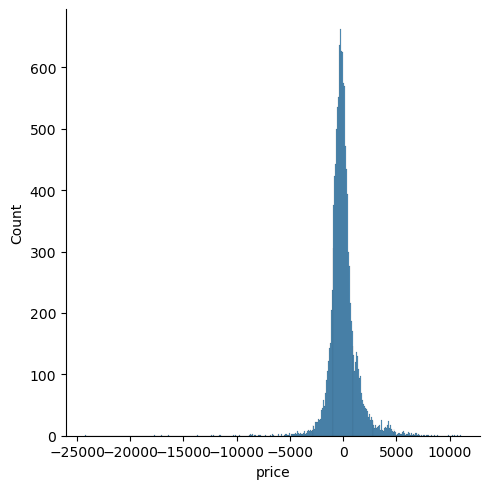

In [33]:
sns.displot(y_test-predictions);

In [34]:
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [35]:
predictions=dtr.predict(X_test)
print(metrics.mean_absolute_error(y_test,predictions))
print(metrics.mean_squared_error(y_test,predictions))
print(np.sqrt(metrics.mean_squared_error(y_test,predictions)))
result_dtr=metrics.explained_variance_score(y_test,predictions)
print(result_dtr)
results.append(result_dtr)


385.29607600803337
618092.3194036768
786.1884757509976
0.9611209270882899


In [36]:
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [37]:
predictions=rfr.predict(X_test)
print(metrics.mean_absolute_error(y_test,predictions))
print(metrics.mean_squared_error(y_test,predictions))
print(np.sqrt(metrics.mean_squared_error(y_test,predictions)))
result_rfr=metrics.explained_variance_score(y_test,predictions)
print(result_rfr)
results.append(result_rfr)


283.53259848601886
324269.88639100874
569.4470005110297
0.9796020880463047


In [38]:
rfc=RandomForestClassifier(n_estimators=100, max_depth=10)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

In [39]:
predictions=rfc.predict(X_test)
print(metrics.mean_absolute_error(y_test,predictions))
print(metrics.mean_squared_error(y_test,predictions))
print(np.sqrt(metrics.mean_squared_error(y_test,predictions)))
result_rfc=metrics.explained_variance_score(y_test,predictions)
print(result_rfc)
results.append(result_rfc)


726.6332457902055
2227195.8346979762
1492.3792529708983
0.8619080010685125


In [40]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [41]:
predictions=knn.predict(X_test)
print(metrics.mean_absolute_error(y_test,predictions))
print(metrics.mean_squared_error(y_test,predictions))
print(np.sqrt(metrics.mean_squared_error(y_test,predictions)))
result_knn=metrics.explained_variance_score(y_test,predictions)
print(result_knn)
results.append(result_knn)


2723.876517843349
14457075.652924454
3802.246132606943
0.09370372945097938


In [42]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(rfr, param_grid, cv=5,verbose=3)
grid_search.fit(X_train,y_train)



Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.892 total time=   0.8s
[CV 2/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.877 total time=   0.8s
[CV 3/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.889 total time=   0.8s
[CV 4/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.893 total time=   0.8s
[CV 5/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.892 total time=   0.8s
[CV 1/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.892 total time=   1.6s
[CV 2/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.878 total time=   1.7s
[CV 3/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.891 total time=   1.7s
[CV 4/5

[CV 1/5] END max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.892 total time=   2.7s
[CV 2/5] END max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.877 total time=   2.6s
[CV 3/5] END max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.891 total time=   2.6s
[CV 4/5] END max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.893 total time=   2.6s
[CV 5/5] END max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.892 total time=   2.6s
[CV 1/5] END max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.892 total time=   0.8s
[CV 2/5] END max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.877 total time=   0.8s
[CV 3/5] END max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.892 total time=   0.8s
[CV 4/5] END max_depth=3, min_samples_leaf=2, min_samples_split=

[CV 1/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.936 total time=   2.6s
[CV 2/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.929 total time=   2.6s
[CV 3/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.936 total time=   2.6s
[CV 4/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.935 total time=   2.6s
[CV 5/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.938 total time=   2.6s
[CV 1/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.935 total time=   4.0s
[CV 2/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.928 total time=   4.0s
[CV 3/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.934 total time=   4.0s
[CV 4/5] END max_depth=5, min_samples_leaf=1, min_samples_split=

[CV 2/5] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.928 total time=   1.3s
[CV 3/5] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.933 total time=   1.3s
[CV 4/5] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.934 total time=   1.3s
[CV 5/5] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.939 total time=   1.3s
[CV 1/5] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.936 total time=   2.6s
[CV 2/5] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.928 total time=   2.6s
[CV 3/5] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.935 total time=   2.6s
[CV 4/5] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.935 total time=   2.6s
[CV 5/5] END max_depth=5, min_samples_leaf=2, min_samples_sp

[CV 2/5] END max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.970 total time=   6.2s
[CV 3/5] END max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.972 total time=   6.1s
[CV 4/5] END max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.970 total time=   6.1s
[CV 5/5] END max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.970 total time=   6.0s
[CV 1/5] END max_depth=8, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.972 total time=   1.9s
[CV 2/5] END max_depth=8, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.970 total time=   1.9s
[CV 3/5] END max_depth=8, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.972 total time=   1.9s
[CV 4/5] END max_depth=8, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.970 total time=   1.9s
[CV 5/5] END max_depth=8, min_samples_leaf=1, min_samples_split=5, n

[CV 3/5] END max_depth=8, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.972 total time=   4.0s
[CV 4/5] END max_depth=8, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.970 total time=   4.0s
[CV 5/5] END max_depth=8, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.970 total time=   4.0s
[CV 1/5] END max_depth=8, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.972 total time=   6.0s
[CV 2/5] END max_depth=8, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.970 total time=   6.0s
[CV 3/5] END max_depth=8, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.972 total time=   6.0s
[CV 4/5] END max_depth=8, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.971 total time=   6.0s
[CV 5/5] END max_depth=8, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.970 total time=   6.0s
[CV 1/5] END max_depth=8, min_samples_leaf=4, min_sample

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 8], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             verbose=3)

In [43]:
print("Best parameters: ", grid_search.best_params_)
result_gscv=grid_search.best_score_
print("Best cross-validation score: ", result_gscv)
results.append(result_gscv)


Best parameters:  {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
Best cross-validation score:  0.9711612267668018


In [44]:
compare = pd.DataFrame({'Algorithms' : models , 'results' : results})
compare.sort_values(by='results' ,ascending=False)

,Algorithms,results
2,Random Forest Regressor,0.979602
5,Grid Search CV,0.971161
1,Decision Tree Regressor,0.961121
0,Linear Regression,0.881357
3,Random Forest Classifier,0.861908
4,KNeighbors Regressor,0.093704


<AxesSubplot:xlabel='results', ylabel='Algorithms'>

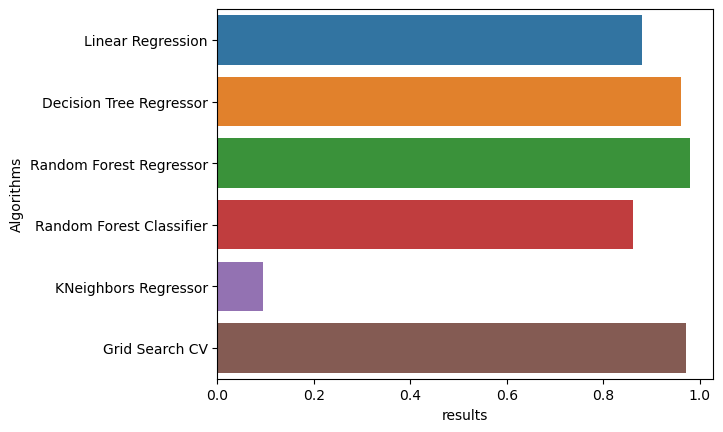

In [45]:
sns.barplot(x = 'results', y = 'Algorithms', data = compare)